Вам дан список. Поменяйте порядок следования элементов, начиная с середины до конца списка.

In [ ]:
list1 = [x for x in input().split()]
mid = len(list1) // 2
newlist = list1[:mid] + list1[mid:][::-1]
print(newlist)

1 2 3 4 5 6
['1', '2', '3', '6', '5', '4']


Вам дан список. Поменяйте в нём местами блоки элементов: каждый чётный со второго по пятый с каждым нечётым со второго по пятый с конца.

In [ ]:
list1 = [x for x in input().split()]
even_block = list1[1:5:2]
odd_block = list1[-5:-1:2]
list1[1:5:2], list1[-5:-1:2] = odd_block, even_block
print(list1)

1 2 3 4 5 6 7 8 9 10
['1', '6', '3', '8', '5', '2', '7', '4', '9', '10']


Вам дан список. Создайте новый список, который возведёт в квадрат элементы исходного списка.

In [ ]:
list1 = [int(x) for x in input().split()]
list2 = [el**2 for el in list1]
print(list2)

6 5 4 3 2 1
[36, 25, 16, 9, 4, 1]


Вам дан список. Создайте новый список, который вычитает из каждого элемента списка пять.

In [ ]:
list1 = [int(x) for x in input().split()]
list2 = [el - 5 for el in list1]
print(list2)

1 2 3 4 5
[-4, -3, -2, -1, 0]


Вам дана строка. Выведите разницу между наибольшим и наименьшим ascii-кодом символа в строке.

In [ ]:
string = [char for char in input()]
string = list(map(ord, string))
maxchar = max(string)
minchar = min(string)
print(maxchar)
print(minchar)
print(maxchar - minchar)

hello world
119
32
87


Вам дана строка. Выведите отсортированную строку, приведённую к верхнему регистру.

In [ ]:
string = input()
string = sorted(string)
string = ''.join(string)
string = string.upper()
print(string)

hello world
 DEHLLLOORW


Вам дан одномерный массив. На основе этого массива сгенерируйте двумерный массив, который группирует по 4 элемента в строку из исходного.

Размерность исходного массива кратна 4.

In [ ]:
import numpy as np
orig = [x for x in input().split()]
orig_arr = np.array([orig])
orig_arr = orig_arr.reshape(len(orig) // 4, 4)
print(orig_arr)

1 2 3 4 5 6 7 8 1 2 3 4 5 6 7 8
[['1' '2' '3' '4']
 ['5' '6' '7' '8']
 ['1' '2' '3' '4']
 ['5' '6' '7' '8']]


Дан массив числе одномерный

Создайте двумерный массив, где строка это бинарное представление числа из исходного.

In [ ]:
import numpy as np
orig = [int(x) for x in input().split()]
binary_array = np.array([list(map(int, bin(x)[2:].zfill(8))) for x in orig])
print(binary_array)

254 34 62 12
[[1 1 1 1 1 1 1 0]
 [0 0 1 0 0 0 1 0]
 [0 0 1 1 1 1 1 0]
 [0 0 0 0 1 1 0 0]]


Какие типы данных присутствуют в датасете?

In [ ]:
import pandas as pd
df = pd.read_csv("/content/laptop_price.csv", encoding = "latin-1")
print(df.dtypes)

laptop_ID             int64
Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price_euros         float64
dtype: object


Есть ли в датасете пропущенные значения? Если да, то сколько и где?

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 1000x600 with 0 Axes>

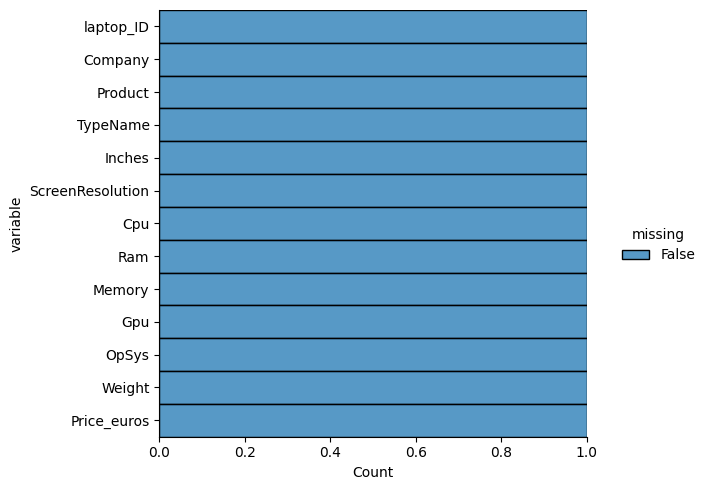

In [ ]:
plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

Очистите переменные: например Ram от Gb (сделав ее числовой), ScreenResolution создайте две колонки, например, ширина отдельно и длинна отдельно (тем самым сделав ее числовой), разделите колонку Cpu отдельно на тип процессора и отдельно на часототу, и так далее.

In [ ]:
df["Ram"] = df["Ram"].str.replace(('GB'), '').astype(int)
df["Weight"] = df["Weight"].str.replace(('kg'), '').astype(float)

In [ ]:
df[['Screen Width', 'Screen Height']] = df['ScreenResolution'].str.extract(r'(\d+)x(\d+)').astype(int)

df['Cpu Type'] = df['Cpu'].str.extract(r'([a-zA-Z\s]+[\d])')
df['Cpu Frequency'] = df['Cpu'].str.extract(r'(\d+\.?\d*)GHz').astype(float)

df['Memory GB'] = df['Memory'].str.extract(r'(\d+)').astype(float)
df['Memory Type'] = df['Memory'].str.replace(('GB'), '').str.extract(r'([a-zA-Z\s]+)')

In [ ]:
df['ScreenResolution'].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,507
1366x768,281
IPS Panel Full HD 1920x1080,230
IPS Panel Full HD / Touchscreen 1920x1080,53
Full HD / Touchscreen 1920x1080,47
1600x900,23
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,15
IPS Panel 4K Ultra HD 3840x2160,12


In [ ]:
0 1 2 3  4  5  6
0 1 4 9 16 25 36

In [ ]:
df.head(6)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Screen Width,Screen Height,Cpu Type,Cpu Frequency,Memory GB,Memory Type
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2560,1600,Intel Core i5,2.3,128.0,SSD
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,1440,900,Intel Core i5,1.8,128.0,Flash Storage
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,1920,1080,Intel Core i5,2.5,256.0,SSD
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,2880,1800,Intel Core i7,2.7,512.0,SSD
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,2560,1600,Intel Core i5,3.1,256.0,SSD
5,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.10,400.00,1366,768,AMD A9,3.0,500.0,HDD


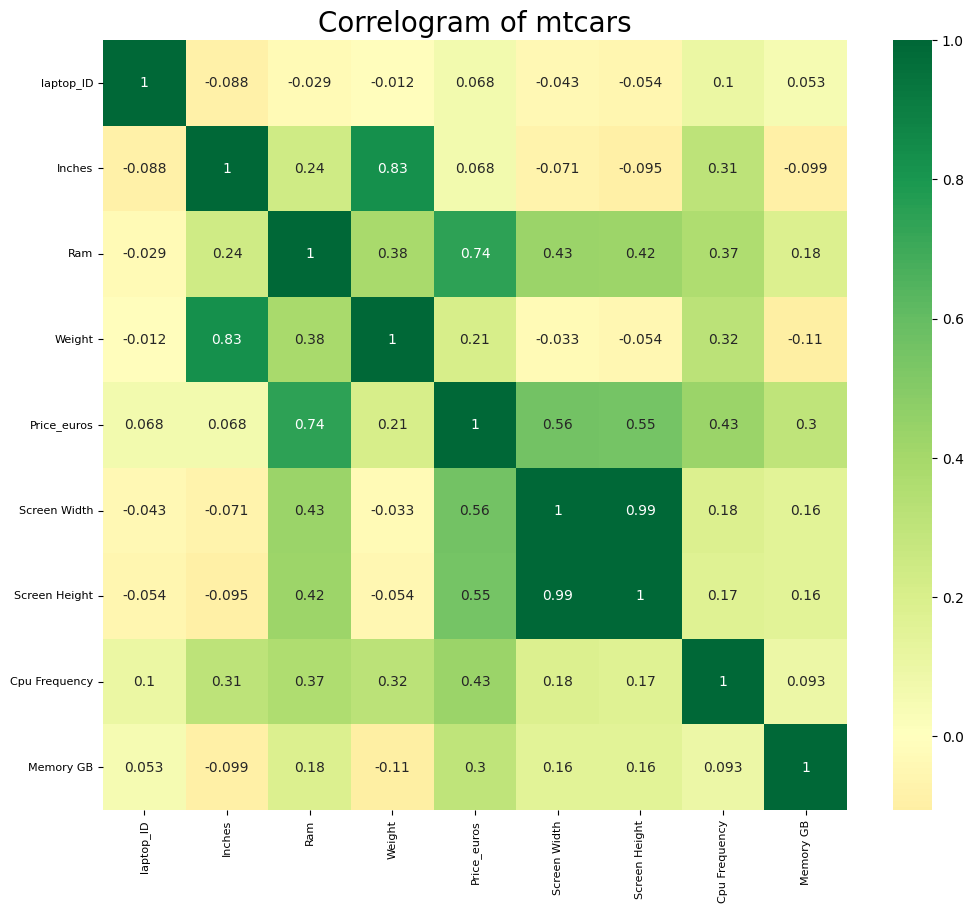

In [ ]:
plt.figure(figsize=(12,10))
nums = df.select_dtypes(include=['number'])
sns.heatmap(nums.corr(), xticklabels=nums.corr().columns, yticklabels=nums.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Correlogram of mtcars', fontsize=20)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

<Figure size 1000x800 with 0 Axes>

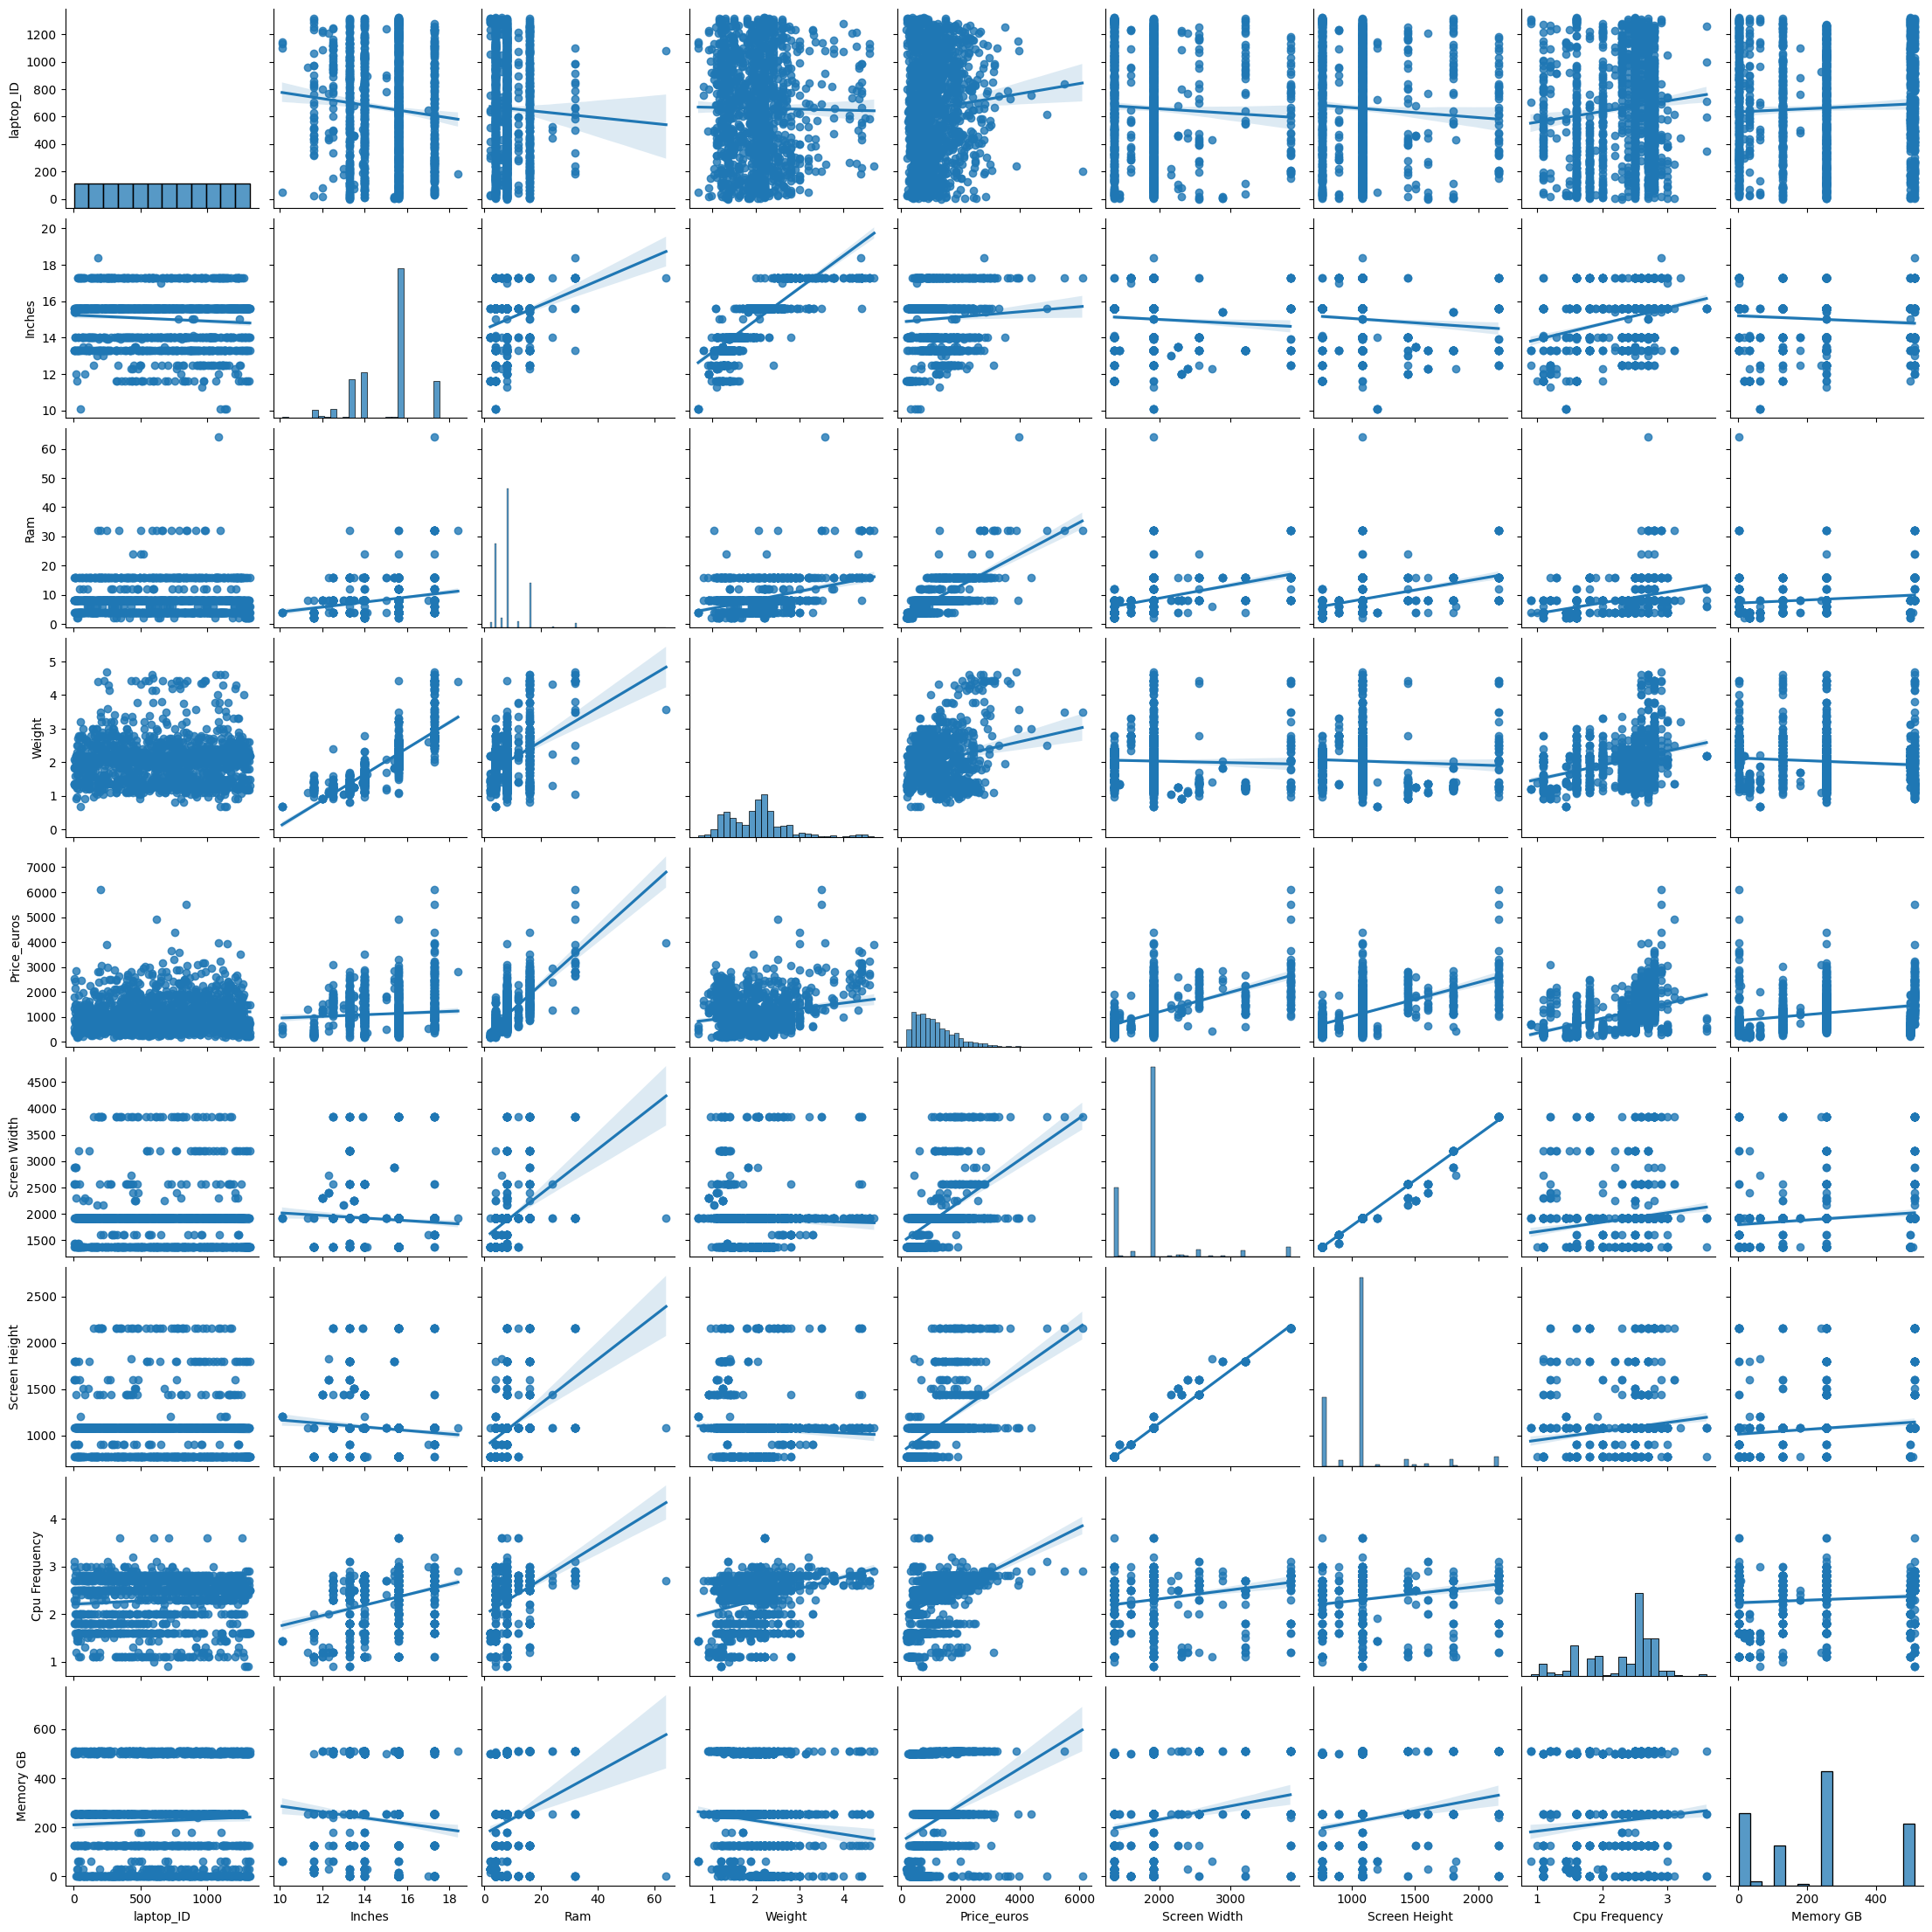

In [ ]:
plt.figure(figsize=(10,8))
sns.pairplot(nums, kind="reg")
plt.show()

<Figure size 2000x2000 with 0 Axes>

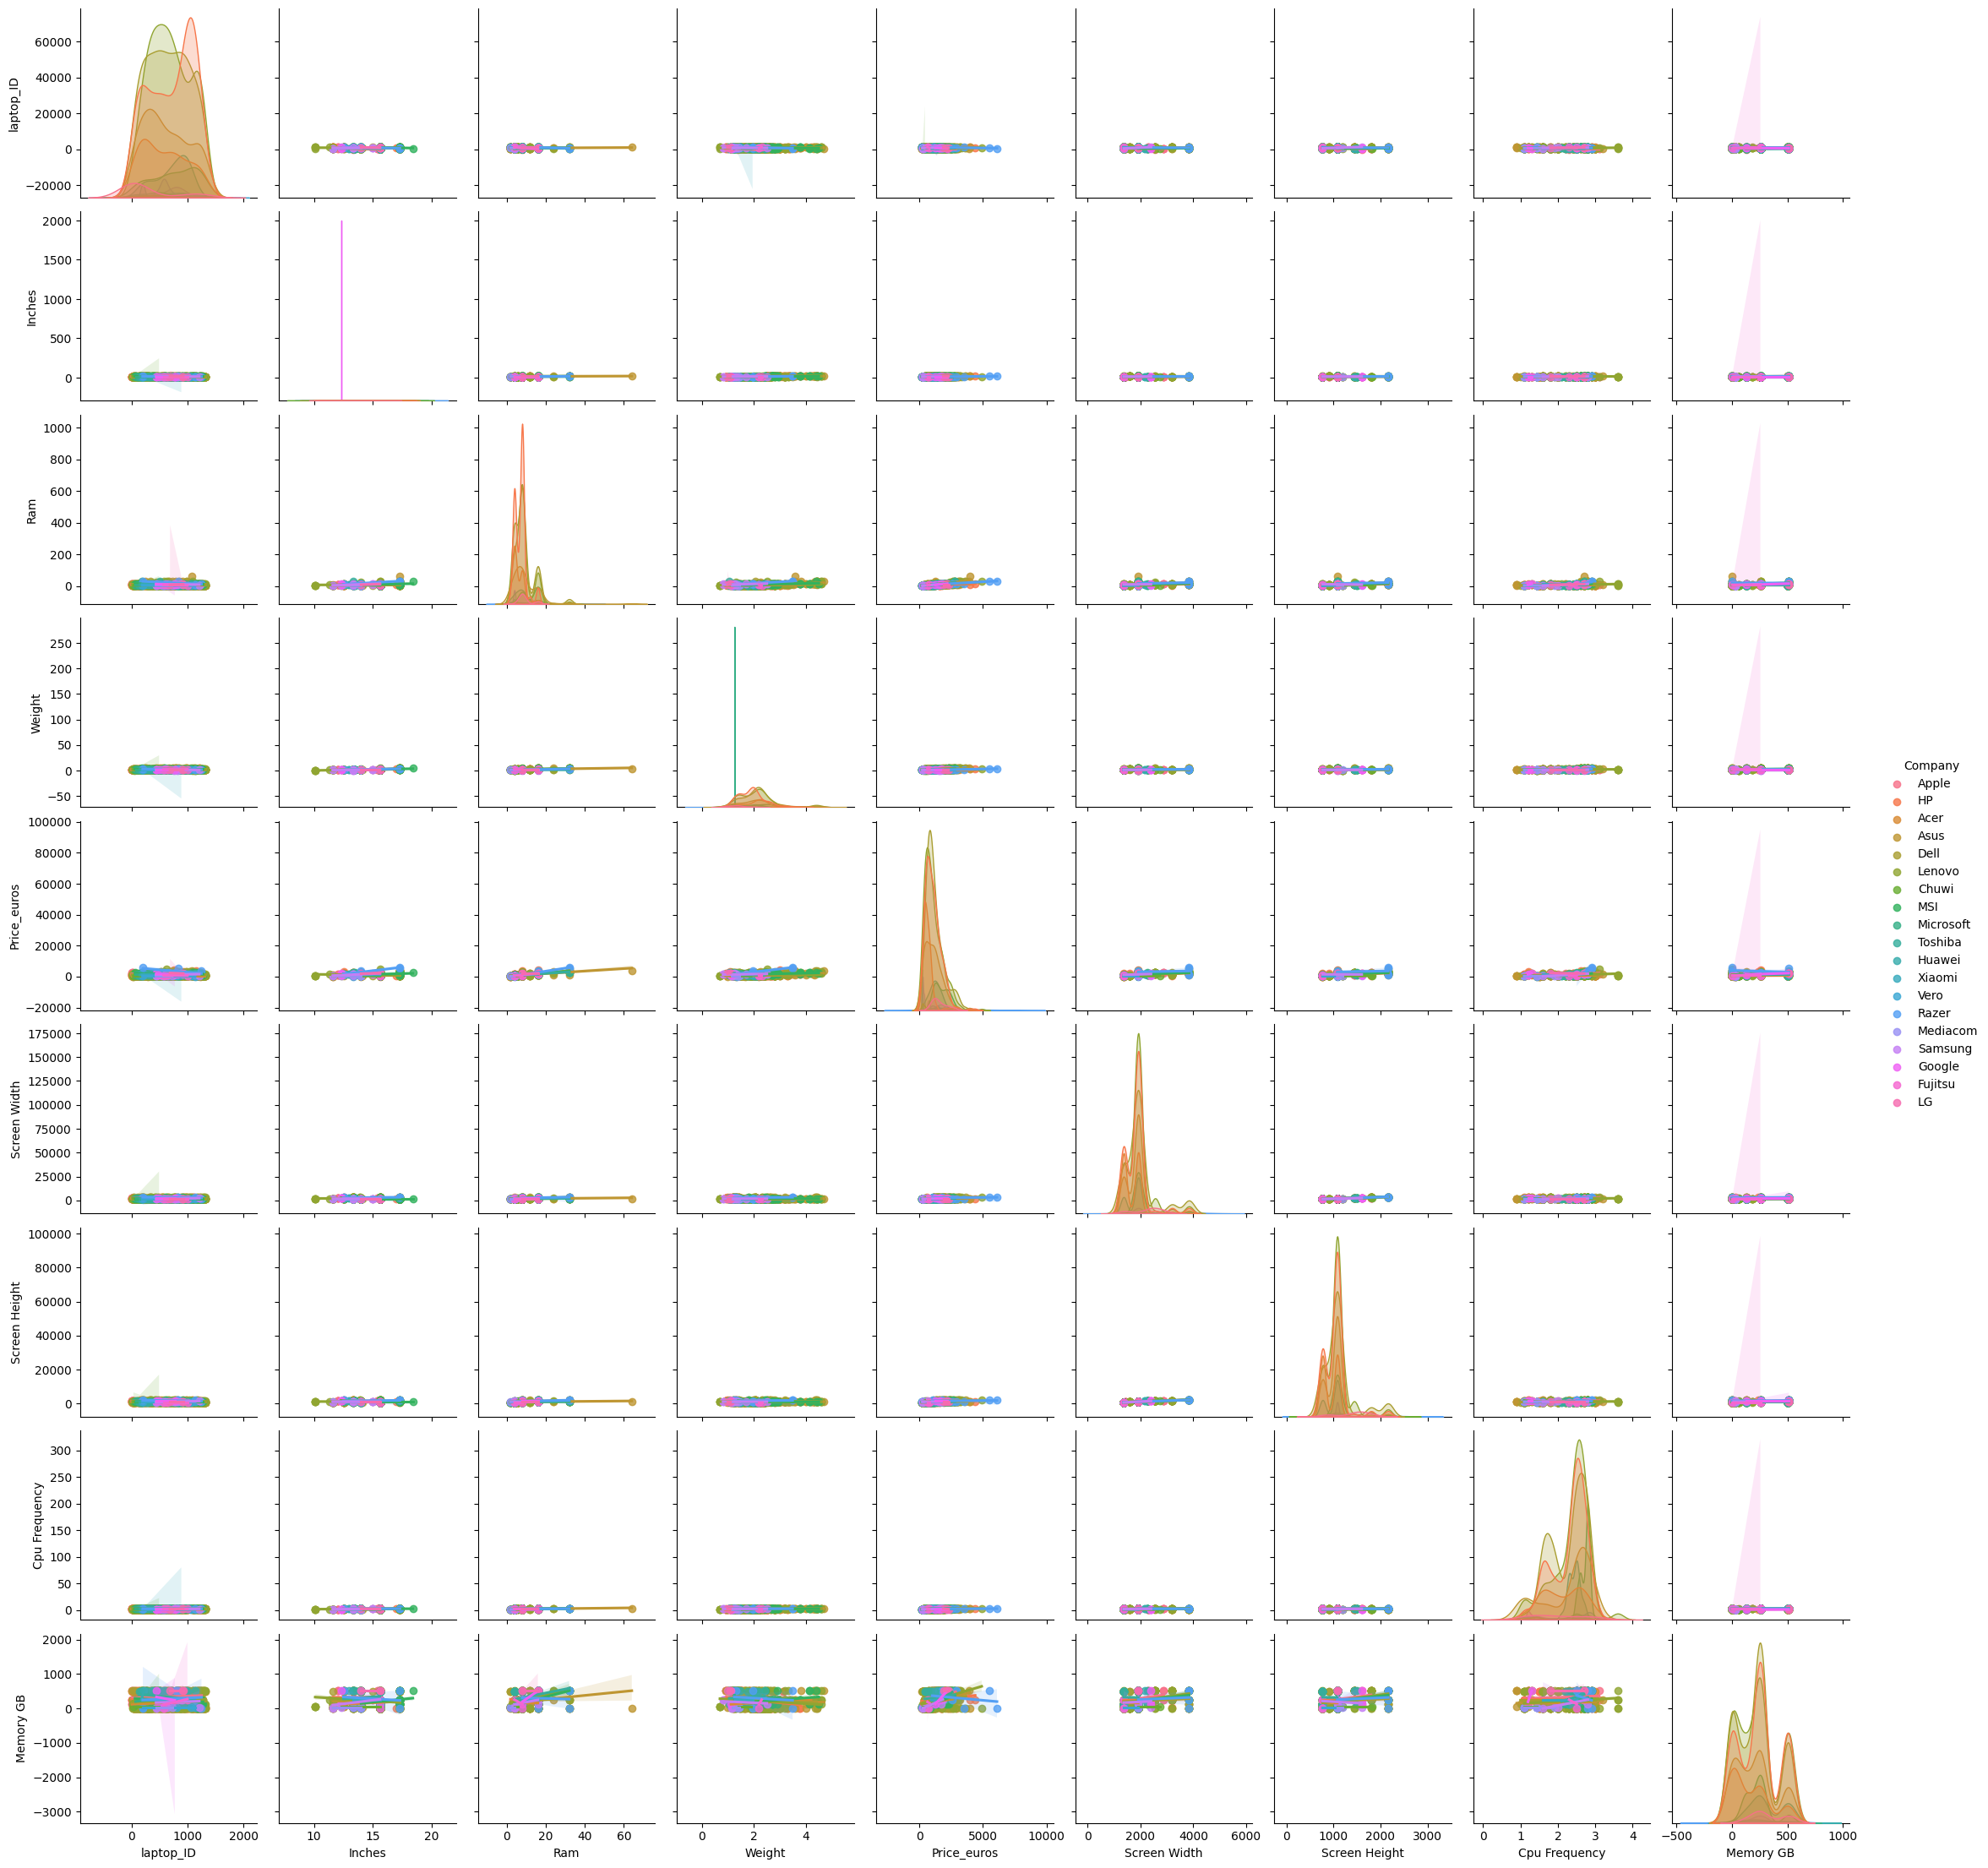

In [ ]:
plt.figure(figsize=(20,20))
nums.insert(0, "Company", df["Company"])
sns.pairplot(nums, kind="reg", hue = "Company")
plt.show()

<Axes: >

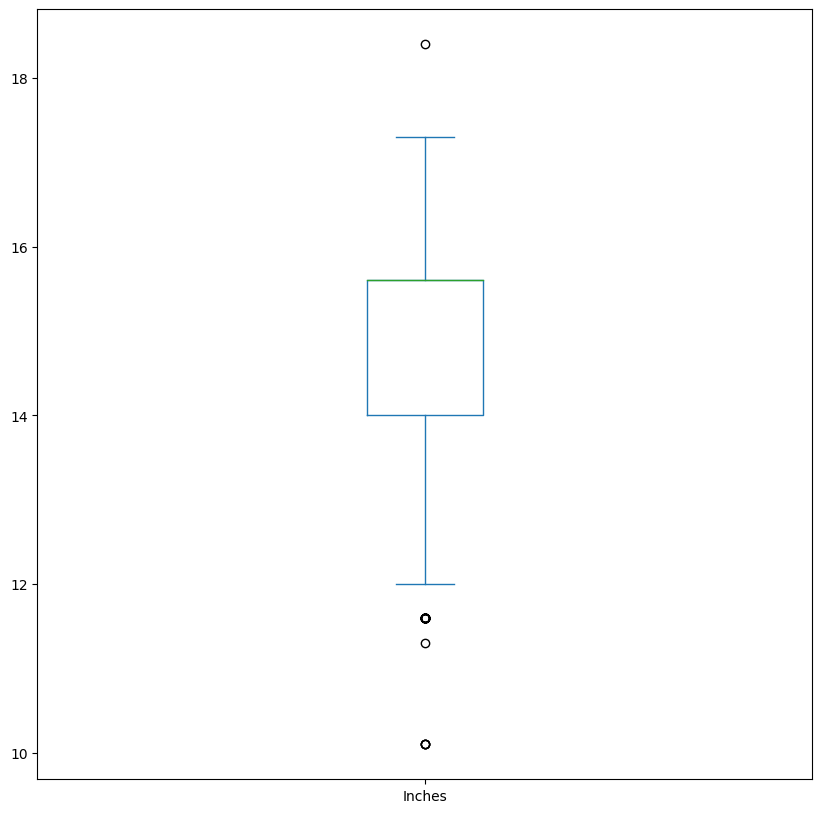

In [ ]:
plt.figure(figsize=(10,10))

df['Inches'].plot(kind='box')

In [ ]:
Q1 =  df['Inches'].quantile(0.25)
Q3 = df['Inches'].quantile(0.75)
IQR = Q3 - Q1

df[(df['Inches'] < Q1-1.5*IQR ) | (df['Inches']> Q3+1.5*IQR)]

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Screen Width,Screen Height,Memory GB
20,21,Asus,Vivobook E200HA,Netbook,11.6,1366x768,NaN,2,32GB,Intel HD Graphics 400,Windows 10,0.98,191.90,1366,768,32.0
50,51,Lenovo,Yoga Book,2 in 1 Convertible,10.1,1920x1200,NaN,4,64GB,Intel HD Graphics 400,Android,0.69,319.00,1920,1200,64.0
177,181,MSI,GT80S 6QF-074US,Gaming,18.4,1920x1080,NaN,32,512GB,Nvidia GTX 980 SLI,Windows 10,4.40,2799.00,1920,1080,512.0
314,319,Asus,VivoBook Flip,2 in 1 Convertible,11.6,1366x768,NaN,2,32GB,Intel HD Graphics 500,Windows 10,1.10,275.00,1366,768,32.0
319,324,Acer,TravelMate B,Notebook,11.6,1366x768,NaN,4,128GB,Intel HD Graphics 405,Windows 10,1.40,485.00,1366,768,128.0
348,354,Asus,VivoBook Flip,2 in 1 Convertible,11.6,1366x768,NaN,4,32GB,Intel HD Graphics 500,Windows 10,1.50,375.00,1366,768,32.0
376,382,Lenovo,Yoga 11e,Netbook,11.6,1366x768,NaN,4,128GB,Intel HD Graphics 500,Windows 10,1.59,553.00,1366,768,128.0
409,416,Lenovo,Lenovo IdeaPad,Notebook,11.6,1366x768,NaN,2,32GB,Intel HD Graphics 500,Windows 10,1.15,304.45,1366,768,32.0
429,436,Mediacom,FlexBook Edge,2 in 1 Convertible,11.6,1920x1080,NaN,4,32GB,Intel HD Graphics 500,Windows 10,1.16,299.00,1920,1080,32.0
430,437,Samsung,Chromebook 3,Netbook,11.6,1366x768,NaN,4,16GB,Intel HD Graphics 400,Chrome OS,1.15,269.00,1366,768,16.0


<Axes: >

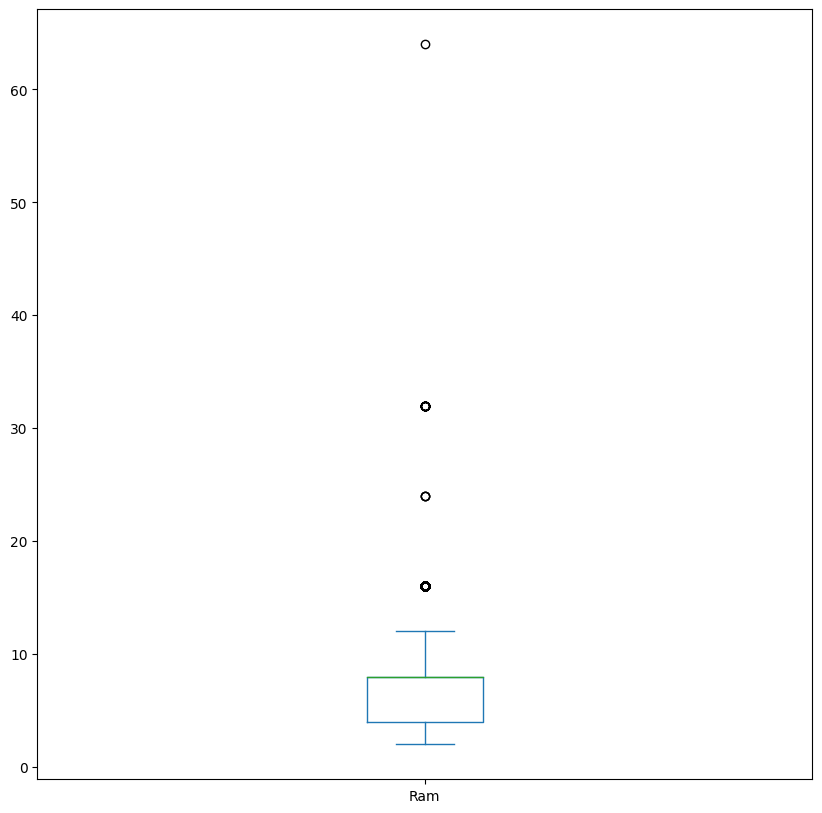

In [ ]:
plt.figure(figsize=(10,10))

df['Ram'].plot(kind='box')

In [ ]:
Q1 =  df['Ram'].quantile(0.25)
Q3 = df['Ram'].quantile(0.75)
IQR = Q3 - Q1

df[(df['Ram'] < Q1-1.5*IQR ) | (df['Ram']> Q3+1.5*IQR)]

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Screen Width,Screen Height,Memory GB
3,4,Apple,MacBook Pro,Ultrabook,15.4,2880x1800,NaN,16,512GB,AMD Radeon Pro 455,macOS,1.83,2537.45,2880,1800,512.0
6,7,Apple,MacBook Pro,Ultrabook,15.4,2880x1800,NaN,16,256GB,Intel Iris Pro Graphics,Mac OS X,2.04,2139.97,2880,1800,256.0
8,9,Asus,ZenBook UX430UN,Ultrabook,14.0,1920x1080,NaN,16,512GB,Nvidia GeForce MX150,Windows 10,1.30,1495.00,1920,1080,512.0
12,13,Apple,MacBook Pro,Ultrabook,15.4,2880x1800,NaN,16,256GB,AMD Radeon Pro 555,macOS,1.83,2439.97,2880,1800,256.0
17,18,Apple,MacBook Pro,Ultrabook,15.4,2880x1800,NaN,16,512GB,AMD Radeon Pro 560,macOS,1.83,2858.00,2880,1800,512.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247,1265,Asus,Rog GL502VS,Gaming,15.6,1920x1080,NaN,16,256GB,Nvidia GeForce GTX 1070,Windows 10,2.34,2325.00,1920,1080,256.0
1256,1274,Asus,Rog G752VT-GC073T,Gaming,17.3,1920x1080,NaN,16,128GB,Nvidia GeForce GTX 970M,Windows 10,4.00,1900.00,1920,1080,128.0
1271,1289,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,3200x1800,NaN,16,512GB,Intel HD Graphics 520,Windows 10,1.30,1499.00,3200,1800,512.0
1285,1303,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,3200x1800,NaN,16,512GB,Intel HD Graphics 520,Windows 10,1.30,1499.00,3200,1800,512.0


<Axes: >

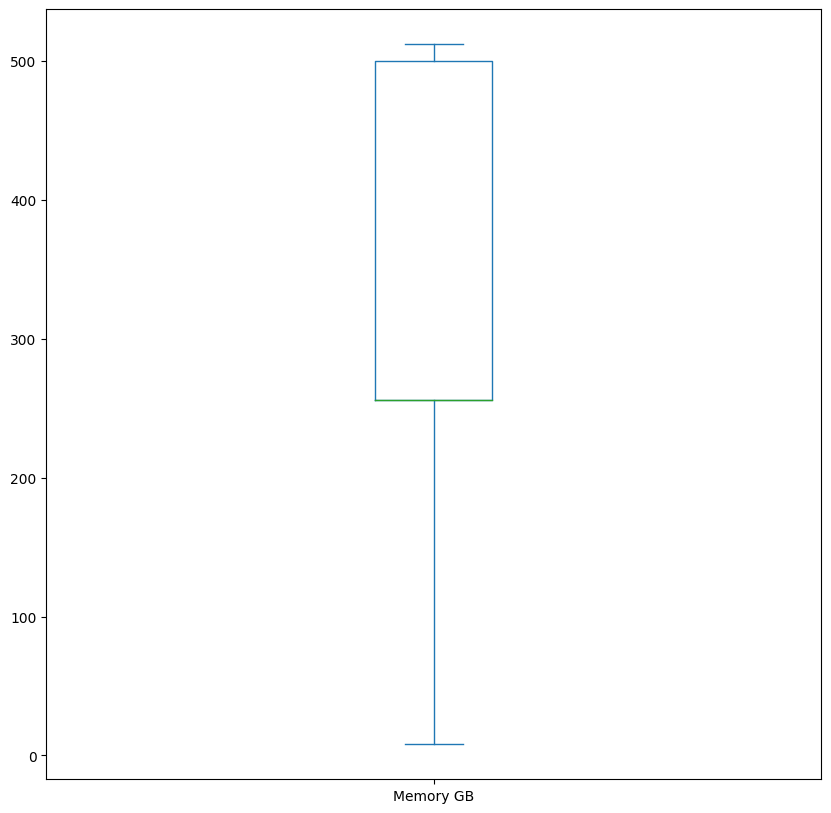

In [ ]:
plt.figure(figsize=(10,10))

df['Memory GB'].plot(kind='box')

In [ ]:
Q1 =  df['Memory GB'].quantile(0.25)
Q3 = df['Memory GB'].quantile(0.75)
IQR = Q3 - Q1

df[(df['Memory GB'] < Q1-1.5*IQR ) | (df['Memory GB']> Q3+1.5*IQR)]

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Screen Width,Screen Height,Memory GB


<Axes: >

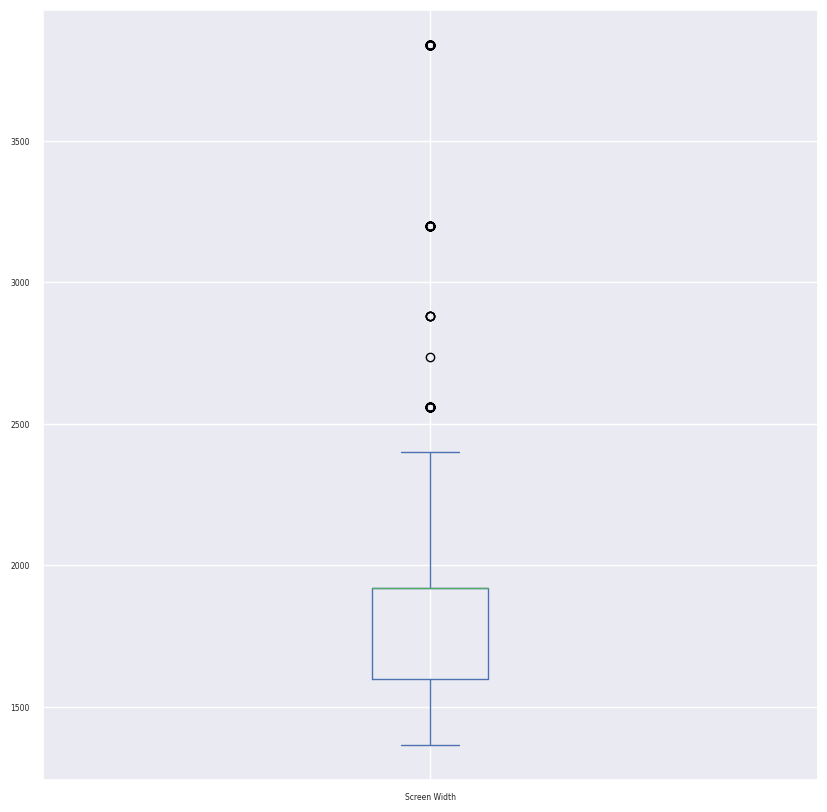

In [ ]:
plt.figure(figsize=(10,10))

df['Screen Width'].plot(kind='box')

In [ ]:
Q1 =  df['Screen Width'].quantile(0.25)
Q3 = df['Screen Width'].quantile(0.75)
IQR = Q3 - Q1

df[(df['Screen Width'] < Q1-1.5*IQR ) | (df['Screen Width']> Q3+1.5*IQR)]

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Screen Width,Screen Height,Memory GB,Cpu Type,Cpu Frequency,Memory Type
0,1,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,NaN,8,128GB,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2560,1600,128.0,NaN,NaN,NaN
3,4,Apple,MacBook Pro,Ultrabook,15.4,2880x1800,NaN,16,512GB,AMD Radeon Pro 455,macOS,1.83,2537.45,2880,1800,512.0,NaN,NaN,NaN
4,5,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,NaN,8,256GB,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,2560,1600,256.0,NaN,NaN,NaN
6,7,Apple,MacBook Pro,Ultrabook,15.4,2880x1800,NaN,16,256GB,Intel Iris Pro Graphics,Mac OS X,2.04,2139.97,2880,1800,256.0,NaN,NaN,NaN
12,13,Apple,MacBook Pro,Ultrabook,15.4,2880x1800,NaN,16,256GB,AMD Radeon Pro 555,macOS,1.83,2439.97,2880,1800,256.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1236,1254,HP,EliteBook 840,Ultrabook,14.0,2560x1440,NaN,8,256GB,Intel HD Graphics 520,Windows 7,1.54,2198.19,2560,1440,256.0,NaN,NaN,NaN
1249,1267,Dell,XPS 13,2 in 1 Convertible,13.3,3200x1800,NaN,8,256GB,Intel HD Graphics 615,Windows 10,1.24,1813.00,3200,1800,256.0,NaN,NaN,NaN
1271,1289,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,3200x1800,NaN,16,512GB,Intel HD Graphics 520,Windows 10,1.30,1499.00,3200,1800,512.0,NaN,NaN,NaN
1285,1303,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,3200x1800,NaN,16,512GB,Intel HD Graphics 520,Windows 10,1.30,1499.00,3200,1800,512.0,NaN,NaN,NaN


<Axes: >

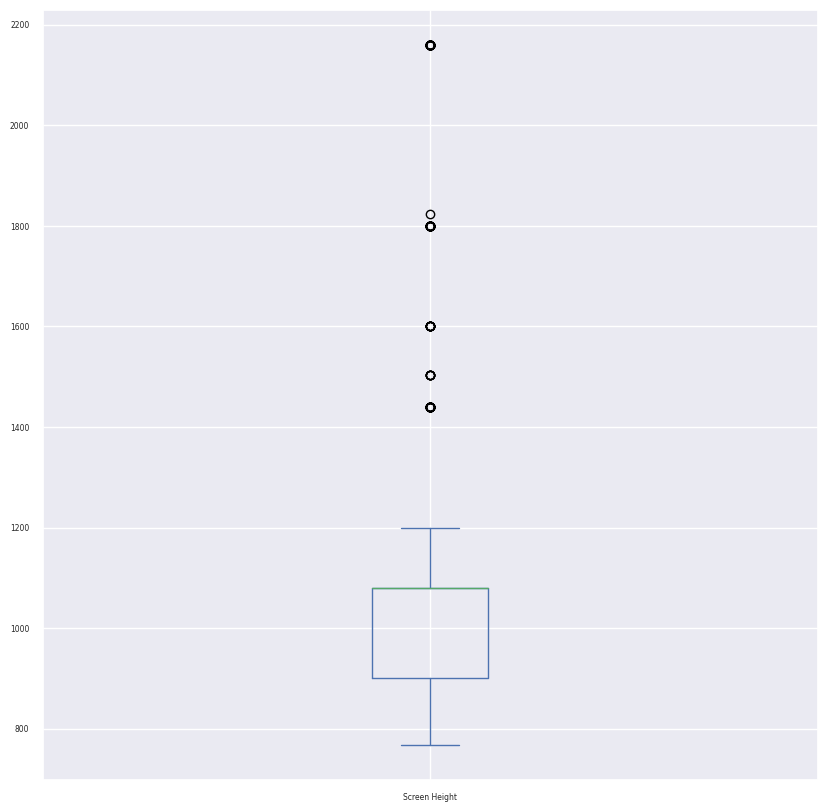

In [ ]:
plt.figure(figsize=(10,10))

df['Screen Height'].plot(kind='box')

In [ ]:
Q1 =  df['Screen Height'].quantile(0.25)
Q3 = df['Screen Height'].quantile(0.75)
IQR = Q3 - Q1

df[(df['Screen Height'] < Q1-1.5*IQR ) | (df['Screen Height']> Q3+1.5*IQR)]

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Screen Width,Screen Height,Memory GB,Cpu Type,Cpu Frequency,Memory Type
0,1,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,NaN,8,128GB,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2560,1600,128.0,NaN,NaN,NaN
3,4,Apple,MacBook Pro,Ultrabook,15.4,2880x1800,NaN,16,512GB,AMD Radeon Pro 455,macOS,1.83,2537.45,2880,1800,512.0,NaN,NaN,NaN
4,5,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,NaN,8,256GB,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,2560,1600,256.0,NaN,NaN,NaN
6,7,Apple,MacBook Pro,Ultrabook,15.4,2880x1800,NaN,16,256GB,Intel Iris Pro Graphics,Mac OS X,2.04,2139.97,2880,1800,256.0,NaN,NaN,NaN
12,13,Apple,MacBook Pro,Ultrabook,15.4,2880x1800,NaN,16,256GB,AMD Radeon Pro 555,macOS,1.83,2439.97,2880,1800,256.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1236,1254,HP,EliteBook 840,Ultrabook,14.0,2560x1440,NaN,8,256GB,Intel HD Graphics 520,Windows 7,1.54,2198.19,2560,1440,256.0,NaN,NaN,NaN
1249,1267,Dell,XPS 13,2 in 1 Convertible,13.3,3200x1800,NaN,8,256GB,Intel HD Graphics 615,Windows 10,1.24,1813.00,3200,1800,256.0,NaN,NaN,NaN
1271,1289,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,3200x1800,NaN,16,512GB,Intel HD Graphics 520,Windows 10,1.30,1499.00,3200,1800,512.0,NaN,NaN,NaN
1285,1303,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,3200x1800,NaN,16,512GB,Intel HD Graphics 520,Windows 10,1.30,1499.00,3200,1800,512.0,NaN,NaN,NaN


<Figure size 1000x1000 with 0 Axes>

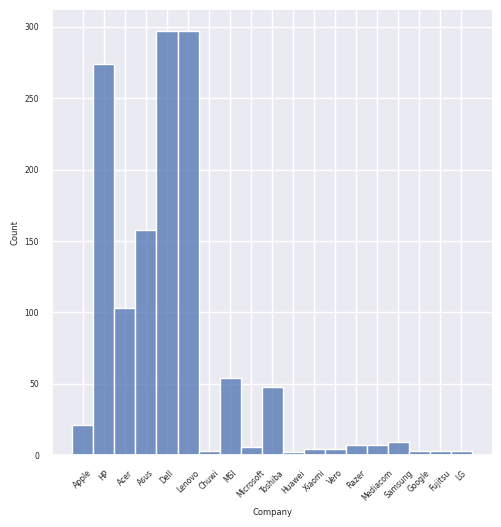

In [ ]:
plt.figure(figsize=(10, 10))
sns.set(font_scale=0.5)
g = sns.displot(data=df, x='Company')
g.set_xticklabels(rotation=45)
plt.show()